In [36]:
%matplotlib inline
from collections import defaultdict, OrderedDict
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

In [4]:
def recurse_add_(word, wvmodel, lista, depth=1, topn=5):
    if depth==1:
        # call add_to_graph and return
        alist = wvmodel.most_similar(word, topn=topn)
        lista[word] = alist
        return
    else:
        # generate wordlist, then call recurse_add_ with each word in wordlist, with depth-1
        alist = wvmodel.most_similar(word, topn=topn)
        for wtuple in alist:
            aword, _ = wtuple
            recurse_add_(aword, wvmodel, lista, depth=depth-1, topn=topn)

In [5]:
def get_words(cw, all_words, dep, tn):
    l_words_dict = {}
    for word in cw:
        if word in all_words:
            recurse_add_(word, wvm, l_words_dict, depth=dep, topn=tn)
        else:
            print ("Word "+word+" not found.")

    l_words_simpl = {}
    for w in l_words_dict :
        l_words_simpl[w] = 1.0
        for ww in l_words_dict[w] :
            l_words_simpl[ww[0]]=ww[1]
    return l_words_simpl

In [6]:
def count_words(myp_p,journ, lista):
    bigram = Phraser.load(path_phraser_models+journ+'_00_bigramphraser')
    texts = {}
    for fname in os.listdir(myp_p):
        text = []
        for line in open(os.path.join(myp_p, fname)):
            text = text + bigram[line.split()]
        frequency = defaultdict(float)
        for word in text:
            frequency[word] += 1
        texts[fname] = frequency
    word_count = {}   
    for fname in texts.keys():
        count = 0.0
        for word in lista.keys() :
            if word in texts[fname].keys() :
                count = count + texts[fname][word] * lista[word]
        word_count[fname] = count
        
    return word_count     
   # print word_count['2016-2-18_0h0m3s__820585877.html.txt']

In [2]:
path_root_processed='C:\\Users\\dell\\Desktop\\Castes\\processed'
path_models = 'C:\\Users\\dell\\Desktop\\Castes\\processed\\word2vec_models'
path_phraser_models='C:\\Users\\dell\\Desktop\\Castes\\processed\\phraser_models\\'

In [58]:
journal = 'IN-indianexpress-india' 
mypath_processed = path_root_processed +'\\'+journal+'\\'

wvm = Word2Vec.load(path_models+'\\'+journal+'_with_phraser').wv
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

scaler = MinMaxScaler(feature_range=(0, 1))

dalits= [u'tribe', u'dalit_community', u'adivasis', u'community', u'maratha_community', u'maratha', u'patidar', u'dalit', u'sikh_community', u'tribals', u'marathas', u'obcs', u'patels', u'upper_castes', u'demand_reservation', u'patidars', u'communities', u'patidar_community', u'marginalised', u'minority_communities', u'dalits', u'tribes', u'caste', u'minority_community', u'muslim_community']
violence= [u'recent_incidents', u'protests', u'agitation', u'demonstrations', u'unrest', u'protest', u'killings', u'communal_tension', u'discrimination', u'baduria', u'clashes', u'erupted', u'rapes', u'violent_protests', u'turmoil', u'exodus', u'oppression', u'massacre', u'killing', u'massive_protests', u'agitations', u'violent_clashes', u'basirhat', u'communal_violence', u'atrocities', u'dharnas', u'arson', u'stir', u'violence', u'violent', u'brutal', u'kashmir_valley', u'communal_riots', u'murders']


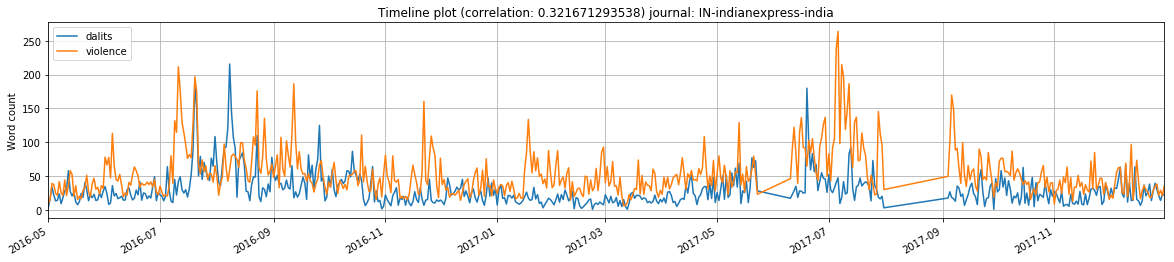

In [59]:
l_words = get_words(['dalits'],all_words,2,6)
wc = count_words(mypath_processed, journal, l_words)
print 'dalits= '+ str(l_words.keys())

wc_summary = defaultdict(float)
for d in wc.keys() :
    m = re.search('([0-9\-]+)\_', d)
    wc_summary[pd.to_datetime(m.group(1))] += wc[d]

wc_ordered = OrderedDict(sorted(wc_summary.items()))
ts1 = pd.Series(wc_ordered.values(), index=wc_ordered.keys())

l_words = get_words(['violence'],all_words,2,6)
wc = count_words(mypath_processed, journal, l_words)
print 'violence= '+str(l_words.keys())

wc_summary = defaultdict(float)
for d in wc.keys() :
    m = re.search('([0-9\-]+)\_', d)
    wc_summary[pd.to_datetime(m.group(1))] += wc[d]

wc_ordered = OrderedDict(sorted(wc_summary.items()))
ts2 = pd.Series(wc_ordered.values(), index=wc_ordered.keys())

txt = '(correlation: '+ str(ts1.corr(ts2,method='pearson')) +') journal: '+ journal
plt.figure(figsize=(20,4))
ts1.plot(label='dalits')
ts2.plot(label='violence')
#plt.plot_date(x=wc_ordered.keys(), y=wc_ordered.values(), fmt="r-")
plt.title("Timeline plot "+ txt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()

person= [u'accused_persons', u'whoever', u'merely', u'others', u'thus', u'whatever', u'individual', u'genuine', u'people', u'anyone', u'therefore', u'someone_else', u'someone', u'somebody', u'nobody', u'persons', u'particular', u'anything', u'youths', u'anybody', u'person', u'individuals']


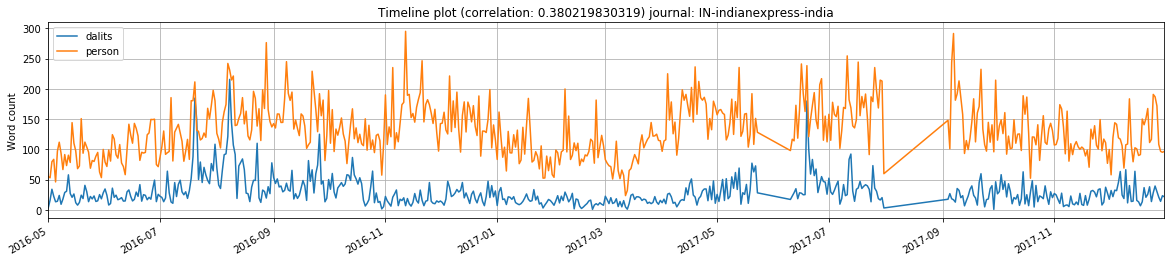

In [60]:
l_words = get_words(['person'],all_words,2,6)
wc = count_words(mypath_processed, journal, l_words)
print 'person= '+ str(l_words.keys())

wc_summary = defaultdict(float)
for d in wc.keys() :
    m = re.search('([0-9\-]+)\_', d)
    wc_summary[pd.to_datetime(m.group(1))] += wc[d]

wc_ordered = OrderedDict(sorted(wc_summary.items()))
ts3 = pd.Series(wc_ordered.values(), index=wc_ordered.keys())

txt = ' (correlation: '+ str(ts1.corr(ts3,method='pearson'))+') journal: '+ journal
plt.figure(figsize=(20,4))
ts1.plot(label='dalits')
ts3.plot(label='person')
#plt.plot_date(x=wc_ordered.keys(), y=wc_ordered.values(), fmt="r-")
plt.title("Timeline plot"+txt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()


computer= [u'servers', u'computer', u'drones', u'electronic', u'web', u'surveillance', u'systems', u'print', u'gps', u'processing', u'cctv', u'global_positioning', u'wireless', u'boxes', u'mobile_phones', u'user', u'sheets', u'sensors', u'database', u'transmission', u'computers', u'devices', u'server', u'materials', u'software', u'biometric']


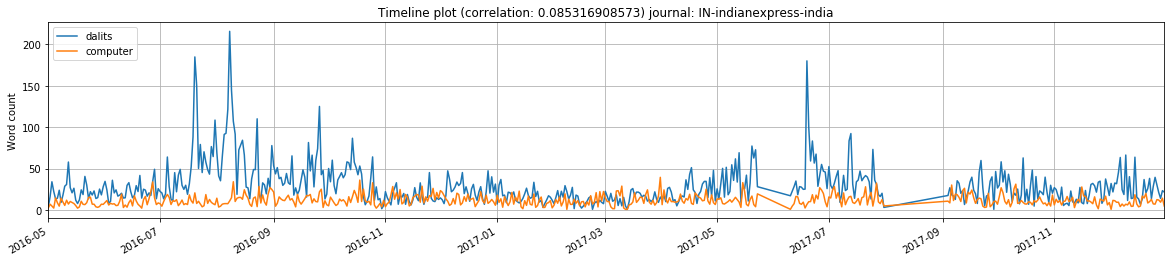

In [61]:
l_words = get_words(['computer'],all_words,2,6)
wc = count_words(mypath_processed, journal, l_words)
print 'computer= '+ str(l_words.keys())

wc_summary = defaultdict(float)
for d in wc.keys() :
    m = re.search('([0-9\-]+)\_', d)
    wc_summary[pd.to_datetime(m.group(1))] += wc[d]

wc_ordered = OrderedDict(sorted(wc_summary.items()))
ts3 = pd.Series(wc_ordered.values(), index=wc_ordered.keys())

txt = ' (correlation: '+ str(ts1.corr(ts3,method='pearson'))+') journal: '+ journal
plt.figure(figsize=(20,4))
ts1.plot(label='dalits')
ts3.plot(label='computer')
#plt.plot_date(x=wc_ordered.keys(), y=wc_ordered.values(), fmt="r-")
plt.title("Timeline plot"+txt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()